In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px


import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("muted")




In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv(r"D:\Projects\Data Analysis Projects\Crime_Data_from_2020_to_Present.csv")
data.sample(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
783555,231511839,07/05/2023 12:00:00 AM,07/04/2023 12:00:00 AM,1000,15,N Hollywood,1517,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,6600 KLUMP AV,NaN,34.1903,-118.3758
816109,231220766,10/05/2023 12:00:00 AM,10/05/2023 12:00:00 AM,400,12,77th Street,1241,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,104.0,DRIVEWAY,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,6200 CRENSHAW BL,NaN,33.9836,-118.3309


In [4]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [5]:
print(data["Status Desc"].unique(),  "\n---------------------------------------------\n", data['Status'].unique())

['Adult Arrest' 'Invest Cont' 'Adult Other' 'Juv Arrest' 'Juv Other' 'UNK'] 
---------------------------------------------
 ['AA' 'IC' 'AO' 'JA' 'JO' 'CC' nan]


# Data Cleaning 


Crm Cd 1        11
Crm Cd 2    917588
Crm Cd 3    984190
Crm Cd 4    986436
dtype: int64  Will Be deleted


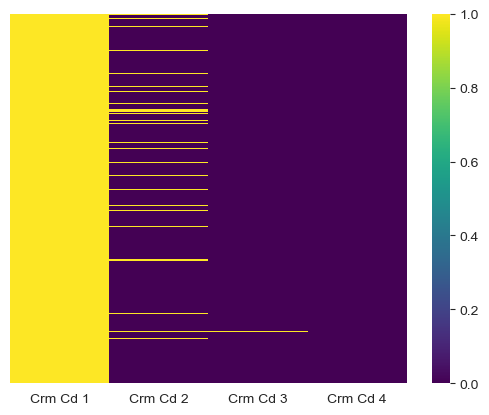

In [6]:
Crmdata = data[['Crm Cd 1','Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']]

print(Crmdata.isnull().sum(), " Will Be deleted") 

sns.heatmap(Crmdata.notnull(), yticklabels=False, cmap="viridis" )
plt.show()

In [7]:
data.drop(
    columns=[
        "DR_NO", 
        "AREA", 
        "Rpt Dist No", 
        "Crm Cd", 
        "Premis Cd", 
        "Premis Desc",
        "Weapon Used Cd", 
        "Status", 
        "Cross Street", 
        "LAT", 
        "LON",
        "Crm Cd 1", 
        "Crm Cd 2", 
        "Crm Cd 3", 
        "Crm Cd 4",
        "Mocodes"
    ],
    inplace=True
)


In [8]:
data.rename(columns={
    "Date Rptd": "notification_date",
    "DATE OCC": "crime_date",
    "TIME OCC": "accident_time",
    "AREA NAME": "area",
    "LOCATION": "location",
    "Part 1-2": "level",
    "Crm Cd Desc": "description_crime",
    "Vict Age": "vict_age",
    "Vict Sex": "vict_sex",
    "Vict Descent": "vict_descent",
    "Weapon Desc": "weapon_used",
    "Status Desc": "status"
}, inplace=True)
data.head(2)

,notification_date,crime_date,accident_time,area,level,description_crime,vict_age,vict_sex,vict_descent,weapon_used,status,location
0,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,Wilshire,1,VEHICLE - STOLEN,0,M,O,NaN,Adult Arrest,1900 S LONGWOOD AV
1,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,Central,1,BURGLARY FROM VEHICLE,47,M,O,NaN,Invest Cont,1000 S FLOWER ST


In [9]:
data["area"].unique()

array(['Wilshire', 'Central', 'Southwest', 'Van Nuys', 'Hollywood',
       'Southeast', 'Newton', 'Mission', 'Rampart', 'West Valley',
       'West LA', 'Olympic', 'Hollenbeck', 'Topanga', 'Northeast',
       '77th Street', 'Pacific', 'N Hollywood', 'Harbor', 'Foothill',
       'Devonshire'], dtype=object)

In [10]:
data['level'].unique()

array([1, 2])

#### Level 1 : Serious Crimes 
#### Level 2 : Less Serious Crimes

In [11]:
data["vict_descent"].unique()

array(['O', 'X', 'H', 'B', 'W', nan, 'A', 'K', 'C', 'J', 'F', 'I', 'V',
       'S', 'P', 'Z', 'G', 'U', 'D', 'L', '-'], dtype=object)

## description 
    O: 'Other / Unknown',
    'X': 'Unknown',
    'H': 'Hispanic / Latino',
    'B': 'Black / African',
    'W': 'White / European',
    None: 'Missing value',
    'A': 'Asian',
    'K': 'Native Hawaiian / Pacific',
    'C': 'Chinese',
    'J': 'Japanese',
    'F': 'Filipino',
    'I': 'Indian',
    'V': 'Vietnamese',
    'S': 'Southeast Asian',
    'P': 'Pacific Islander',
    'Z': 'Other / Mixed',
    'G': 'German',
    'U': 'Unknown / Unclassified',
    'D': 'Dominican / Hispanic',
    'L': 'Latino / Hispanic',
    '-': 'Dash / Unknown'


In [12]:
data[data['vict_descent'] == '-']

,notification_date,crime_date,accident_time,area,level,description_crime,vict_age,vict_sex,vict_descent,weapon_used,status,location
755934,04/12/2023 12:00:00 AM,03/30/2023 12:00:00 AM,1200,Van Nuys,2,DOCUMENT FORGERY / STOLEN FELONY,38,M,-,NaN,Invest Cont,15300 MAGNOLIA BL
807484,06/29/2023 12:00:00 AM,06/29/2023 12:00:00 AM,2115,Olympic,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,-,-,NaN,Invest Cont,1900 S WESTERN AV


In [13]:
data['vict_descent'].replace("-", "X", inplace=True)


In [14]:
data[data['vict_descent']== '-']

,notification_date,crime_date,accident_time,area,level,description_crime,vict_age,vict_sex,vict_descent,weapon_used,status,location


In [15]:
CodeX = data[data['vict_descent'] == 'X']['vict_descent'].count()
print(f"Values that contain the code X are: {CodeX}")



Values that contain the code X are: 103968


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986500 entries, 0 to 986499
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   notification_date  986500 non-null  object
 1   crime_date         986500 non-null  object
 2   accident_time      986500 non-null  int64 
 3   area               986500 non-null  object
 4   level              986500 non-null  int64 
 5   description_crime  986500 non-null  object
 6   vict_age           986500 non-null  int64 
 7   vict_sex           846925 non-null  object
 8   vict_descent       846914 non-null  object
 9   weapon_used        326368 non-null  object
 10  status             986500 non-null  object
 11  location           986500 non-null  object
dtypes: int64(3), object(9)
memory usage: 90.3+ MB


notification_date         0
crime_date                0
accident_time             0
area                      0
level                     0
description_crime         0
vict_age                  0
vict_sex             139575
vict_descent         139586
weapon_used          660132
status                    0
location                  0
dtype: int64


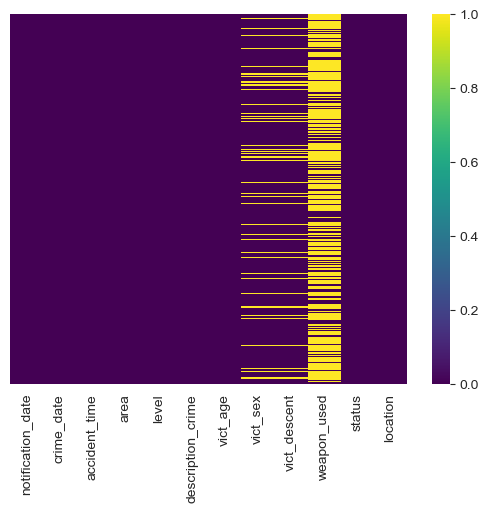

In [17]:
print(data.isnull().sum())
sns.heatmap(data.isnull(), yticklabels= False, cmap='viridis')
plt.show()

In [18]:
data['vict_sex']= data['vict_sex'].map({"M" : "Male" , "F": "Female"})

In [19]:
data['vict_sex'].unique()

array(['Male', nan, 'Female'], dtype=object)

In [20]:
data[data['vict_sex'].isnull()].sample(2)

,notification_date,crime_date,accident_time,area,level,description_crime,vict_age,vict_sex,vict_descent,weapon_used,status,location
114550,07/17/2020 12:00:00 AM,07/17/2020 12:00:00 AM,341,Southwest,1,VEHICLE - STOLEN,0,NaN,NaN,NaN,Invest Cont,1200 W 30TH ST
966207,04/16/2024 12:00:00 AM,04/01/2024 12:00:00 AM,815,Central,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0,NaN,X,NaN,Invest Cont,700 S FIGUEROA ST


In [21]:
MSData= data[data['vict_sex'] == 'Male'][['vict_sex','accident_time','level']]
MSData

,vict_sex,accident_time,level
0,Male,2130,1
1,Male,1800,1
3,Male,2037,1
4,Male,1200,2
5,Male,2300,2
...,...,...,...
986485,Male,1545,1
986486,Male,1125,1
986487,Male,2230,1
986490,Male,1920,2


In [22]:
FSData= data[data['vict_sex'] == 'Female'][['vict_sex','accident_time','level']]
FSData

,vict_sex,accident_time,level
7,Female,1110,2
8,Female,1400,2
11,Female,1,1
12,Female,800,2
15,Female,805,2
...,...,...,...
986492,Female,2330,1
986493,Female,1510,2
986494,Female,2345,1
986495,Female,2300,1


In [23]:
MFData = data [['vict_sex', 'accident_time', 'level']]
MFData

,vict_sex,accident_time,level
0,Male,2130,1
1,Male,1800,1
2,NaN,1700,1
3,Male,2037,1
4,Male,1200,2
...,...,...,...
986495,Female,2300,1
986496,NaN,1400,1
986497,NaN,100,2
986498,Female,1500,1


vict_sex  level
Female    1        155445
          2        198243
Male      1        237819
          2        160129
Name: vict_sex, dtype: int64 
____________________



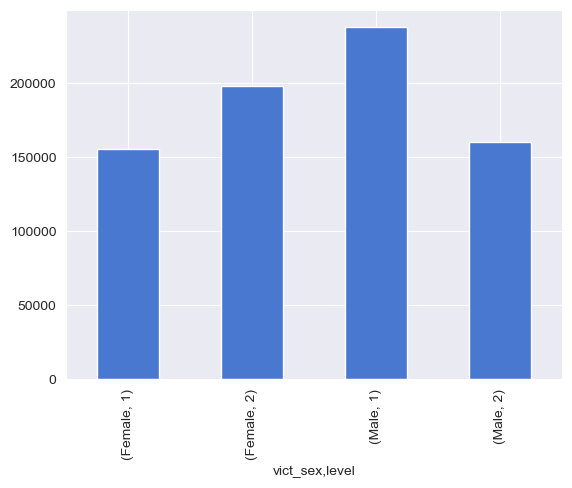

In [24]:
print(MFData.groupby(['vict_sex','level'], dropna= True)['vict_sex'].count(),"\n____________________\n")

MFData.groupby(['vict_sex','level'], dropna= True)['vict_sex'].count().plot(kind= 'bar')
plt.show()

In [25]:
for index in data.index:
    if pd.isnull(data.loc[index, "vict_sex"]):
        if data.loc[index, "level"] == 1:
            data.loc[index,"vict_sex"] = "Male"
        else:
            data.loc[index, "vict_sex"] = "Female"


In [26]:
data["vict_sex"].isnull().sum()

np.int64(0)

In [27]:
data

,notification_date,crime_date,accident_time,area,level,description_crime,vict_age,vict_sex,vict_descent,weapon_used,status,location
0,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,Wilshire,1,VEHICLE - STOLEN,0,Male,O,NaN,Adult Arrest,1900 S LONGWOOD AV
1,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,Central,1,BURGLARY FROM VEHICLE,47,Male,O,NaN,Invest Cont,1000 S FLOWER ST
2,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,Southwest,1,BIKE - STOLEN,19,Male,X,NaN,Invest Cont,1400 W 37TH ST
3,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,Van Nuys,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,Male,O,NaN,Invest Cont,14000 RIVERSIDE DR
4,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,Hollywood,2,THEFT OF IDENTITY,28,Male,H,NaN,Invest Cont,1900 TRANSIENT
...,...,...,...,...,...,...,...,...,...,...,...,...
986495,08/20/2024 12:00:00 AM,08/17/2024 12:00:00 AM,2300,Olympic,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",36,Female,C,NaN,Invest Cont,3700 WILSHIRE BL
986496,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,Wilshire,1,VEHICLE - STOLEN,0,Male,NaN,NaN,Invest Cont,4000 W 23RD ST
986497,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,Central,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0,Female,X,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,1300 W SUNSET BL
986498,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,Southwest,1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",70,Female,W,STICK,Invest Cont,FLOWER ST


In [28]:
data['vict_descent'].isnull().sum()

np.int64(139586)

In [29]:
data['vict_descent'].fillna("X", inplace= True)

In [30]:
data['weapon_used'].isnull().sum()


np.int64(660132)

In [31]:
data['weapon_used'].value_counts()

weapon_used
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    174484
UNKNOWN WEAPON/OTHER WEAPON                        36010
VERBAL THREAT                                      23806
HAND GUN                                           20123
SEMI-AUTOMATIC PISTOL                               7250
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          2
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

In [32]:
data['weapon_used'].fillna("UNKNOWN", inplace = True)


In [33]:
data[data['vict_age'] == 0]

,notification_date,crime_date,accident_time,area,level,description_crime,vict_age,vict_sex,vict_descent,weapon_used,status,location
0,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,Wilshire,1,VEHICLE - STOLEN,0,Male,O,UNKNOWN,Adult Arrest,1900 S LONGWOOD AV
13,05/06/2022 12:00:00 AM,11/01/2020 12:00:00 AM,130,West Valley,1,VEHICLE - STOLEN,0,Male,X,UNKNOWN,Invest Cont,VALJEAN ST
23,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,Hollenbeck,1,VEHICLE - STOLEN,0,Male,X,UNKNOWN,Invest Cont,200 E AVENUE 28
26,02/23/2022 12:00:00 AM,08/14/2020 12:00:00 AM,1300,Topanga,2,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0,Female,X,UNKNOWN,Invest Cont,7700 SAUSALITO AV
27,05/03/2020 12:00:00 AM,05/02/2020 12:00:00 AM,1800,Rampart,1,VEHICLE - STOLEN,0,Male,X,UNKNOWN,Invest Cont,2500 W 4TH ST
...,...,...,...,...,...,...,...,...,...,...,...,...
986482,02/29/2024 12:00:00 AM,02/28/2024 12:00:00 AM,100,Pacific,1,VEHICLE - STOLEN,0,Male,X,UNKNOWN,Invest Cont,1300 APPLETON WY
986489,09/20/2024 12:00:00 AM,09/16/2024 12:00:00 AM,1800,N Hollywood,1,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,Male,X,UNKNOWN,Invest Cont,6100 WHITSETT AV
986496,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,Wilshire,1,VEHICLE - STOLEN,0,Male,X,UNKNOWN,Invest Cont,4000 W 23RD ST
986497,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,Central,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0,Female,X,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,1300 W SUNSET BL


In [34]:
mean_age = round(np.mean(data['vict_age']), 2)
mean_age

np.float64(29.05)

In [35]:
data['vict_age'] = data['vict_age'].replace(0, mean_age)


In [36]:
data['vict_age']= data['vict_age'].astype(int)
data['vict_age']

0         29
1         47
2         19
3         19
4         28
          ..
986495    36
986496    29
986497    29
986498    70
986499    29
Name: vict_age, Length: 986500, dtype: int64

In [37]:
data.duplicated().sum()

np.int64(4808)

In [38]:
data[(data.duplicated(keep= False)) & (data["vict_age"] == 29)]

,notification_date,crime_date,accident_time,area,level,description_crime,vict_age,vict_sex,vict_descent,weapon_used,status,location
511,03/16/2022 12:00:00 AM,01/01/2020 12:00:00 AM,1,Wilshire,2,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",29,Female,X,UNKNOWN,Invest Cont,1800 S FAIRFAX AV
1479,03/16/2022 12:00:00 AM,01/01/2020 12:00:00 AM,1,Wilshire,2,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",29,Female,X,UNKNOWN,Invest Cont,1800 S FAIRFAX AV
1799,03/16/2022 12:00:00 AM,01/01/2020 12:00:00 AM,1,Wilshire,2,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",29,Female,X,UNKNOWN,Invest Cont,1800 S FAIRFAX AV
2114,04/06/2020 12:00:00 AM,04/06/2020 12:00:00 AM,1,Rampart,1,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",29,Male,X,UNKNOWN,Invest Cont,1700 CLINTON ST
2362,11/01/2020 12:00:00 AM,10/31/2020 12:00:00 AM,2330,Newton,1,VEHICLE - STOLEN,29,Male,X,UNKNOWN,Invest Cont,3500 AVALON BL
...,...,...,...,...,...,...,...,...,...,...,...,...
985841,08/27/2024 12:00:00 AM,08/27/2024 12:00:00 AM,1900,Olympic,2,BATTERY POLICE (SIMPLE),29,Female,X,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1100 S VERMONT AV
985868,05/27/2024 12:00:00 AM,05/26/2024 12:00:00 AM,850,Mission,1,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",29,Male,X,UNKNOWN,Invest Cont,14300 ARMINTA ST
986111,01/31/2024 12:00:00 AM,01/31/2024 12:00:00 AM,645,Central,2,TRESPASSING,29,Male,O,UNKNOWN,Invest Cont,200 S HOPE ST
986245,09/10/2024 12:00:00 AM,09/10/2024 12:00:00 AM,1635,Rampart,1,SHOPLIFTING - PETTY THEFT ($950 & UNDER),29,Male,W,UNKNOWN,Invest Cont,1600 WILSHIRE BL


In [39]:
print("Duplicated Values :" , data.drop_duplicates(inplace = True))


Duplicated Values : None


In [40]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981692 entries, 0 to 986499
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   notification_date  981692 non-null  object
 1   crime_date         981692 non-null  object
 2   accident_time      981692 non-null  int64 
 3   area               981692 non-null  object
 4   level              981692 non-null  int64 
 5   description_crime  981692 non-null  object
 6   vict_age           981692 non-null  int64 
 7   vict_sex           981692 non-null  object
 8   vict_descent       981692 non-null  object
 9   weapon_used        981692 non-null  object
 10  status             981692 non-null  object
 11  location           981692 non-null  object
dtypes: int64(3), object(9)
memory usage: 97.4+ MB


In [41]:
data["notification_date"].str.contains("12:00:00 AM").sum()

np.int64(981692)

In [42]:
data["notification_date"] = data["notification_date"].str.replace("12:00:00 AM", '',)
data["notification_date"]

0         03/01/2020 
1         02/09/2020 
2         11/11/2020 
3         05/10/2023 
4         08/18/2022 
             ...     
986495    08/20/2024 
986496    07/24/2024 
986497    01/15/2024 
986498    04/24/2024 
986499    08/13/2024 
Name: notification_date, Length: 981692, dtype: object

In [43]:
data["crime_date"] = data["crime_date"].str.replace("12:00:00 AM", '')
data["crime_date"]


0         03/01/2020 
1         02/08/2020 
2         11/04/2020 
3         03/10/2020 
4         08/17/2020 
             ...     
986495    08/17/2024 
986496    07/23/2024 
986497    01/15/2024 
986498    04/24/2024 
986499    08/12/2024 
Name: crime_date, Length: 981692, dtype: object

In [44]:
data["notification_date"]= pd.to_datetime(data["notification_date"])
data["crime_date"]= pd.to_datetime(data["crime_date"])



In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981692 entries, 0 to 986499
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   notification_date  981692 non-null  datetime64[ns]
 1   crime_date         981692 non-null  datetime64[ns]
 2   accident_time      981692 non-null  int64         
 3   area               981692 non-null  object        
 4   level              981692 non-null  int64         
 5   description_crime  981692 non-null  object        
 6   vict_age           981692 non-null  int64         
 7   vict_sex           981692 non-null  object        
 8   vict_descent       981692 non-null  object        
 9   weapon_used        981692 non-null  object        
 10  status             981692 non-null  object        
 11  location           981692 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 97.4+ MB


In [46]:
data['accident_time'].value_counts().sort_index(ascending= False)

accident_time
2359      756
2358       81
2357       69
2356       52
2355     1209
        ...  
5        3154
4         160
3         182
2         184
1       16995
Name: count, Length: 1439, dtype: int64

In [47]:
accident_time= []


for num in data['accident_time']:
    if num <= 24:
        new = num * 100
        accident_time.append(new)
    elif num > 24 & num < 100:
        new2 = num * 10 
        accident_time.append(new2)
    else:
        accident_time.append(num)

In [48]:
data['accident_time'] = accident_time

In [49]:
data[data['accident_time'] == 4]

,notification_date,crime_date,accident_time,area,level,description_crime,vict_age,vict_sex,vict_descent,weapon_used,status,location


In [50]:
data.sample(2)

,notification_date,crime_date,accident_time,area,level,description_crime,vict_age,vict_sex,vict_descent,weapon_used,status,location
233456,2023-05-30,2021-09-11,11000,Newton,2,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",29,Female,X,UNKNOWN,Invest Cont,200 E 45TH ST
927074,2024-08-01,2024-08-01,10100,Harbor,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",76,Male,W,UNKNOWN,Invest Cont,400 W 11TH ST


In [51]:
data["level"].replace({1: "Serious" , 2 : "Less Serious" } , inplace=True) 
data.sample(5)

,notification_date,crime_date,accident_time,area,level,description_crime,vict_age,vict_sex,vict_descent,weapon_used,status,location
624510,2022-08-19,2022-08-18,5450,Devonshire,Less Serious,CONTEMPT OF COURT,25,Female,W,UNKNOWN,Adult Other,10400 CANOGA AV
588310,2022-01-27,2022-01-27,16360,Pacific,Serious,THEFT PLAIN - PETTY ($950 & UNDER),36,Male,W,UNKNOWN,Adult Arrest,12000 BRADDOCK DR
118439,2020-05-20,2020-05-20,7000,Hollenbeck,Less Serious,BATTERY - SIMPLE ASSAULT,71,Male,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,4TH ST
616292,2022-12-01,2022-11-30,18570,Wilshire,Serious,THEFT PLAIN - PETTY ($950 & UNDER),26,Female,X,UNKNOWN,Invest Cont,400 S COCHRAN AV
370129,2021-06-19,2021-06-18,23000,Van Nuys,Serious,BURGLARY,43,Male,O,UNKNOWN,Invest Cont,13300 VENTURA BL


In [52]:
data.to_csv("CleanData_Crimes1.csv")

## Crime Analysis by area and level

In [53]:
level = data['level'].value_counts()
level 

level
Serious         585338
Less Serious    396354
Name: count, dtype: int64

In [54]:
area = data['area'].value_counts()
area

area
Central        67672
77th Street    60709
Pacific        57755
Southwest      55956
Hollywood      51304
N Hollywood    50009
Olympic        49000
Southeast      48952
Newton         48190
Wilshire       47062
Rampart        45727
West LA        44701
Van Nuys       41924
Northeast      41890
West Valley    41309
Devonshire     40733
Topanga        40460
Harbor         40366
Mission        39381
Hollenbeck     36120
Foothill       32472
Name: count, dtype: int64

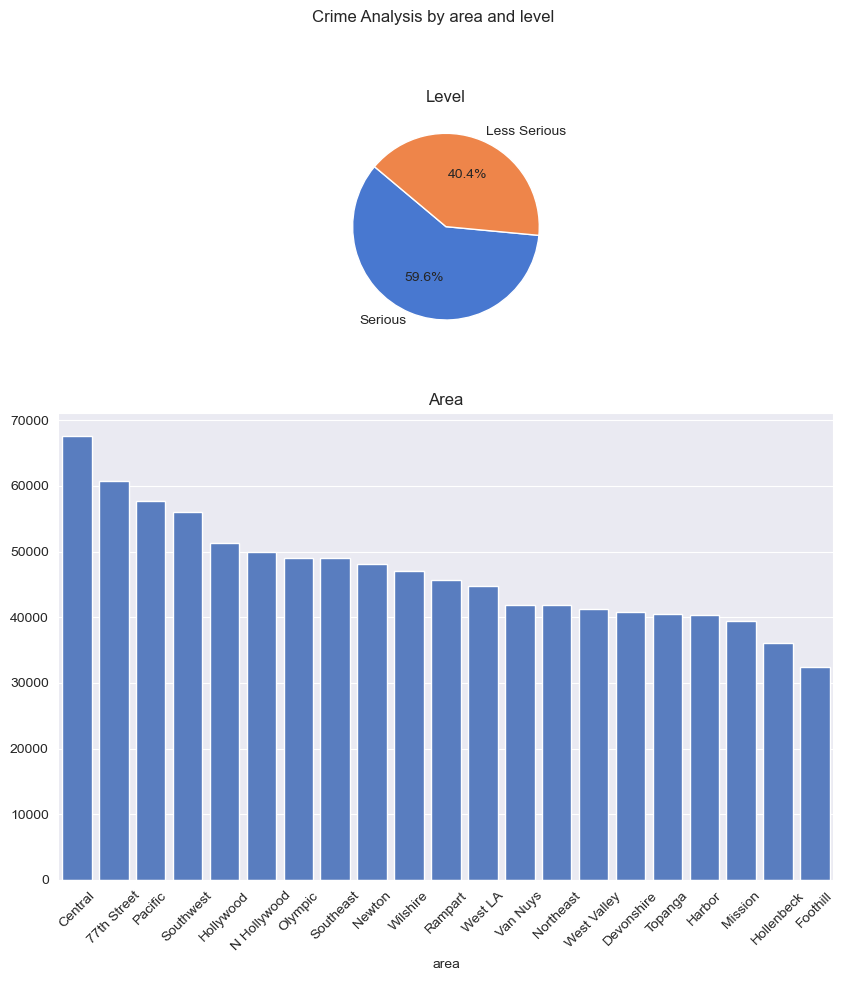

In [55]:
fig , axes = plt.subplots(2 , 1 , figsize = (10 , 10), gridspec_kw={'height_ratios': [1, 2]})

fig.suptitle("Crime Analysis by area and level", fontsize = 12)

axes[0].pie(level.values , labels = level.index , autopct = "%1.1f%%" , startangle = 140)
axes[0].set_title("Level")

sns.barplot(x = area.index, y = area.values, ax = axes[1])
axes[1].set_title("Area")
axes[1].set_xticklabels(labels = area.index, rotation = 45)

plt.show()


## General Conclusion 

Crime is concentrated in specific hotspots—mainly Central, 77th Street, and Pacific—and serious offenses make up the majority (≈60%), indicating high-risk areas that need focused attention.

## Recommendation

Prioritize targeted policing and resource deployment in the top hots

## Type of Common Crimes  in each Area

In [56]:
data.sample(2)

,notification_date,crime_date,accident_time,area,level,description_crime,vict_age,vict_sex,vict_descent,weapon_used,status,location
307521,2021-11-11,2021-08-05,17280,Pacific,Less Serious,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",29,Female,X,UNKNOWN,Invest Cont,8700 BELLANCA AV
185192,2020-08-02,2020-08-02,400,Topanga,Less Serious,VIOLATION OF RESTRAINING ORDER,53,Male,H,UNKNOWN,Adult Other,20400 SHERMAN WY


In [57]:
!pip install plotly

In [58]:
common_crim = data.groupby("area")["description_crime"].value_counts().sort_values(ascending=False).head(10).reset_index(name="count")
common_crim

,area,description_crime,count
0,Central,BURGLARY FROM VEHICLE,9281
1,77th Street,VEHICLE - STOLEN,8496
2,Newton,VEHICLE - STOLEN,7986
3,Southeast,VEHICLE - STOLEN,6969
4,Central,BATTERY - SIMPLE ASSAULT,6778
5,Southwest,VEHICLE - STOLEN,6421
6,Pacific,VEHICLE - STOLEN,6259
7,Hollenbeck,VEHICLE - STOLEN,5961
8,Harbor,VEHICLE - STOLEN,5884
9,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",5815


In [59]:
coordinates = {
    'Central': (34.0522, -118.2437),
    '77th Street': (33.9731, -118.2827),
    'Newton': (34.0224, -118.2851),
    'Southeast': (33.9891, -118.2569),
    'Southwest': (34.0505, -118.3093),
    'Pacific': (33.9850, -118.4695),
    'Hollenbeck': (34.0384, -118.2075),
    'Harbor': (33.7866, -118.2987)
}

common_crim['lat'] = common_crim['area'].map(lambda x: coordinates.get(x, (0,0))[0])
common_crim['lon'] = common_crim['area'].map(lambda x: coordinates.get(x, (0,0))[1])

common_crim['crime_type'] = common_crim['description_crime'].map({
    'BURGLARY FROM VEHICLE': 'Stealing from cars',
    'VEHICLE - STOLEN': 'Car theft',
    'BATTERY - SIMPLE ASSAULT': 'Simple assault',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Serious assault'
})

# إنشاء الخريطة
fig = px.scatter_mapbox(common_crim,
                       lat='lat',
                       lon='lon',
                       size='count',  
                       color='crime_type',  
                       hover_name='area',  
                       hover_data={
                           'crime_type': True,  
                           'count': True,      
                           'lat': False,       
                           'lon': False, 
                       },     
                       size_max=50,  
                       zoom=10,
                       center=dict(lat=34.0522, lon=-118.2437),
                       title='Analyzing crime in Los Angeles by type and number'
                       )

fig.update_layout(
    mapbox_style='carto-positron',
    paper_bgcolor='white',
    height=800,
    title={
        'text': 'Analyzing crime in Los Angeles by type and number',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    legend_title_text='Type of crime',
    legend={
        'orientation': 'h',
        'yanchor': 'bottom',
        'y': -0.1,
        'xanchor': 'center',
        'x': 0.5
    }
)

fig.update_traces(
    hovertemplate="<b>Area: %{hovertext}</b><br>" +
                  "Type of offense: %{customdata[0]}<br>" +
                  "Number: %{customdata[1]}<br>"
)

fig.show()

fig.write_html("detailed_crime_map.html")

print("\nSummary for Crimes")
summary = common_crim.groupby('crime_type').agg({
    'count': ['sum', 'mean', 'count']
}).round(2)
print(summary)


Summary for Crimes
                    count               
                      sum     mean count
crime_type                              
Car theft           47976  6853.71     7
Serious assault      5815  5815.00     1
Simple assault       6778  6778.00     1
Stealing from cars   9281  9281.00     1


## Analysis the timeline of the crimes

In [89]:
data["range_time"]= pd.cut(data["accident_time"]
        ,bins=[0, 600, 1200, 1800, 2400]
        ,labels= ["Night", "Morning", "Afternoon", "Evening"]
        ,right= False)


In [90]:
range_time = data['range_time'].value_counts().sort_values(ascending= False).reset_index(name= 'count')
range_time


,range_time,count
0,Night,33271
1,Evening,22008
2,Morning,17617
3,Afternoon,16006


  range_time  count
0      Night  33271
1    Evening  22008
2    Morning  17617
3  Afternoon  16006


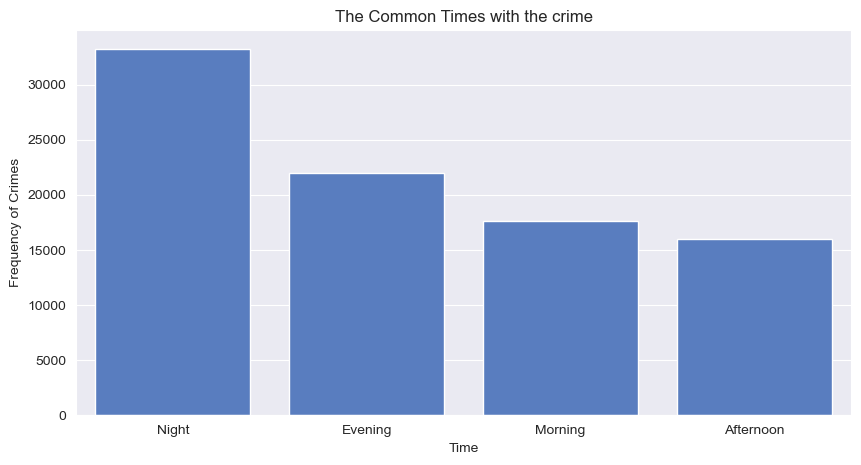

In [91]:
print (range_time)


plt.figure(figsize=(10,5))
sns.barplot(x=range_time["range_time"], y= range_time["count"], order= range_time["range_time"])

plt.title("The Common Times with the crime")
plt.xlabel("Time")
plt.ylabel("Frequency of Crimes")


plt.show()